`Alexei Raiu (#207330006)`

# 2. Exam 2 - Filters.

## Resources

- [Datahacker: How to smooth and sharpen an image in OpenCV](http://datahacker.rs/004-how-to-smooth-and-sharpen-an-image-in-opencv/)
- [OpenCV: Histogram Equalization](https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html)
- [Vose: Relationship between cdf and density](https://www.vosesoftware.com/riskwiki/Relationshipbetweencdfanddensity(histogram)plots.php)

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

We will use the grayscale MRI 1280x720 image for filtering.

Dim: 1280x720


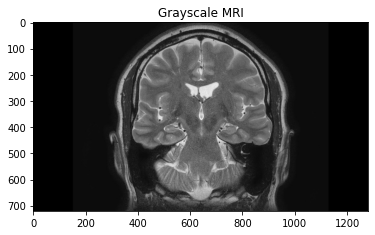

In [2]:
img = cv2.imread('mri.jpg', 0)
plt.figure()
plt.title('Grayscale MRI')
plt.imshow(img, cmap="gray")
print(f'Dim: {img.shape[1]}x{img.shape[0]}')

## Blur Filter

Blur filter is a kind of filter for which no kernel needs to be specified - it's
built-in in cv2, and you only need to specify the kernel size. We use 30x30 kernel
size in this case.

Blurring occurs when the cental point of the kernel is assigned an average value
of the surrounding pixels in the kernel. The bigger the kernel, the more blurry
is the result.

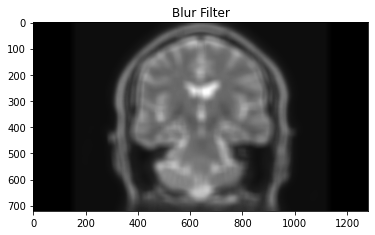

In [3]:
blurred = cv2.blur(img, (30, 30))
plt.figure()
plt.title('Blur Filter')
plt.imshow(blurred, cmap="gray")

## Sharpen Filter.

For the sharpen filter, we use a kernel. A kernel is an array, which tells the
filter how to treat the pixels. For sharpening, we decrease the neighboring
values and increase the current value. Then, we run this kernel through the c2's
generic `filter2D()` function.

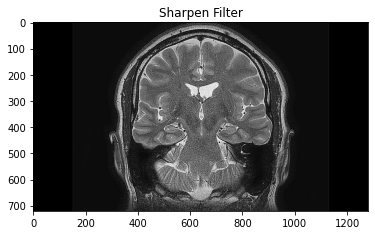

In [4]:
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpen_img = cv2.filter2D(img, 0, kernel)
plt.figure()
plt.title('Sharpen Filter')
plt.imshow(sharpen_img, cmap="gray")

## Laplacian Filter.

Laplacian filter is type of a sharpening filter, which is used for edge-detection.

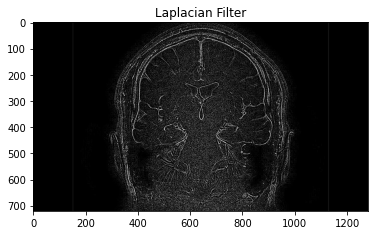

In [5]:
kernel = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
laplacian_img = cv2.filter2D(img, 0, kernel)
plt.figure()
plt.title('Laplacian Filter')
plt.imshow(laplacian_img, cmap="gray")

## Sepia Transform.

The use of Sepia transform is aesthetic, but it serves an example how color values
can be manipulated to achieve certain colorization of an image.

While Sepia is usually called a filter in image editing software, technically it
is a transform, because we are not basing out value on the neighboring values,
but applying the calculation to each array element (cv2's `transform()` function).

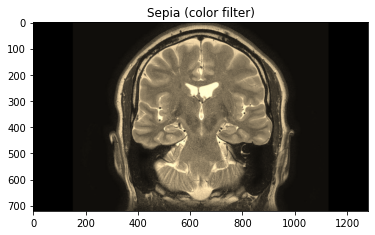

In [6]:
imgColor = cv2.imread('mri.jpg', 1)
kernel = np.array([[0.393, 0.769, 0.189],
                   [0.349, 0.686, 0.168],
                   [0.272, 0.534, 0.131]])
sepia = cv2.transform(imgColor,kernel)
plt.figure()
plt.title('Sepia (color filter)')
plt.imshow(sepia)

## Emboss Filter.

Emboss filter is an aesthetic filter, which darkens the upper part of the matrix
and lightens the bottom part, creating an illusion of downcast light.

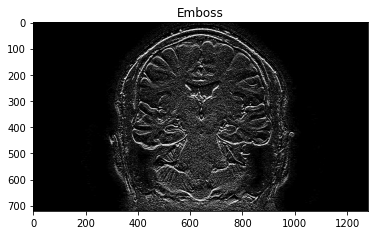

In [7]:
kernel = np.array([[0,10,0],[0,0,0],[0,-10,0]])
emboss = cv2.filter2D(img, -1, kernel)
plt.figure()
plt.title('Emboss')
plt.imshow(emboss, cmap="gray")

## Histogram Normalization

Often the captured images don't use the whole dynamic range. This happens because
of the insufficient lighting, or other factors as film specifics and degradation.
Sometimes narrow dynamic range is ok, especially, if it correctly reflects the
surroundings. Most photos can be spoiled by auto-correction.

However, for medical images, it's not the aesthetics we are looking for, but the
differences, the information in the picture. Narrow range can make important
differences too weak to beseen by a human eye. Auto-correcting the range, in such
case, will allow the human eye to see those differences.

![Histogram normalization](https://docs.opencv.org/master/histogram_equalization.png)

Here on a histogram we see that our MRI has the biggest chunk of data as black.
Actually, this is OK because this is the specific of the image. But then we can
also see, that the whites are badly under-represented, and on the ODF diagram we
can see, that most of the information of pixels is stored in the darker tones.

This means, that there is a part of the dynamic range, with values of 180 and up,
which is unused.

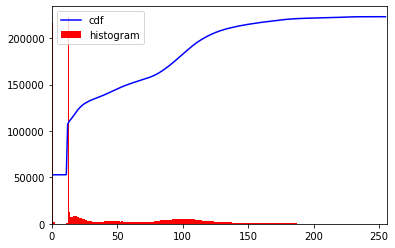

In [8]:
hist, bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

We can stretch the values, so that the whole range is taken.
This wil also make the differences more pronounced.

For dynamic range auto-correction, we are using cv2's `equalizeHist()` function.

Now if we look at the image again, we will see, that it has become brighter. The
previously unused lighter parts of the spectrum are now in use. THis has increased
the contrast, image details are now more pronounced.

If we look at the histogram, we can see, that it's more evenly spread now. There
could still be more work done on it, since we see that approximately a third of
the range now is wasted on the difference between the true black of the unlit
film background and the false black (gray) of the image background itself. This
could be achieved by cropping the true blacks before doing the histogram
normalization.

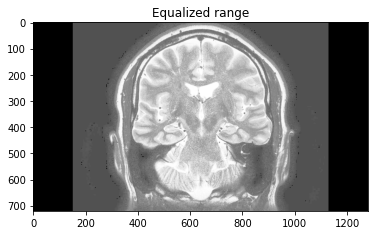

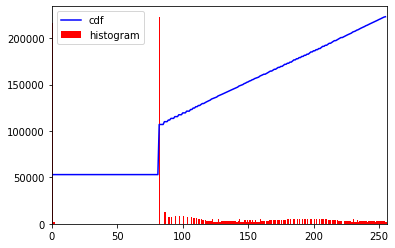

In [9]:
equ = cv2.equalizeHist(img)
plt.figure()
plt.title('Equalized range')
plt.imshow(equ, cmap="gray")

plt.figure()
hist, bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Here we cropped the image hoping to preserve the valuable dynamic range. It did
help much in this case, because there are true black artifacts on this image that
skew the values. But in the cases where there are no artifacts, this would resolve
the issue.

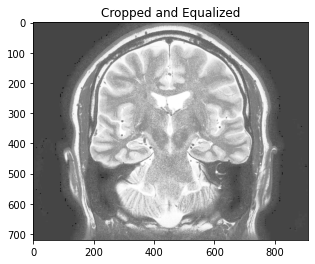

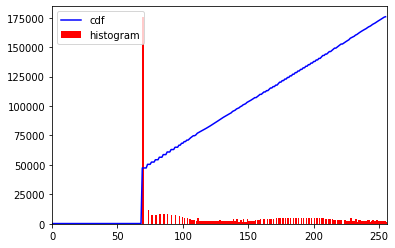

In [10]:
cropped = img[0:720, 190:1100]
equ = cv2.equalizeHist(cropped)
plt.figure()
plt.title('Cropped and Equalized')
plt.imshow(equ, cmap="gray")

plt.figure()
hist, bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Here we will perform the correction for the previous use case, and will remove the
true blacks, replacing the values of 0...60 with 60. THis will eliminate the
"dead" values, and then the histogram equalization will yield better results.

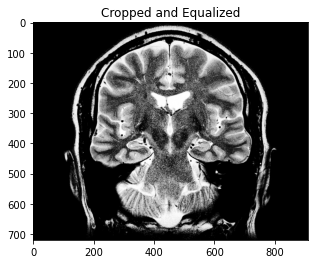

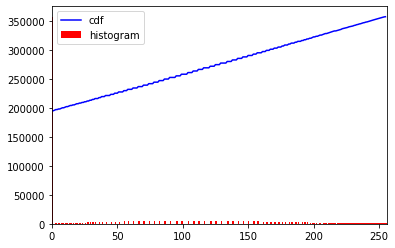

In [11]:
cropped = img[0:720, 190:1100]
cropped[np.where((cropped<[60]))] = [60]

equ = cv2.equalizeHist(cropped)
plt.figure()
plt.title('Cropped and Equalized')
plt.imshow(equ, cmap="gray")

plt.figure()
hist, bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
